<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Madhya%20Pradesh/bjpMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 667 (delta 7), reused 0 (delta 0), pack-reused 648
Receiving objects: 100% (667/667), 32.96 MiB | 14.87 MiB/s, done.
Resolving deltas: 100% (284/284), done.


In [2]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"bjp MP"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('bjp_mp.csv',index = False)

Streaming output truncated to the last 5000 lines.
GauravR_Mishra
India
WordPress.com
0
9744
6723
0
<--------------------------------------------------->
1657
2020-11-16 20:13:43
1328431072602820608
False
@RURALINDIA @INCIndia @RahulGandhi That's what used to happen when BJP was at the loosing end. You could answer for Bihar, but what would you say for UP elections or the loss of Govt in MP? Or crushing defeat of INC in MP &amp; Gujrat by-polls?
Introspection is the key here. Change in leadership is a must now!
HereIs_Archit

Twitter Web App
1
109
265
0
<--------------------------------------------------->
1658
2020-11-16 19:22:01
1328418060131135488
False
@EconomicTimes @ManojTiwariMP bjp will form in up and manoj ji will be leading it from front like he did in DELHI HADD HAY THERE SHOULD BE A CRITERIA TO BE MP ALSI U MUST HAVE 16-17 CLASS EDUCATION not LIKE this uneducated MPS
aaditya0712
कोलकाता, भारत
Twitter for Android
0
22
40
0
<---------------------------------------------------

In [3]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2010 non-null   datetime64[ns]
 1   Tweet_id   2010 non-null   int64         
 2   Verified   2010 non-null   bool          
 3   Tweet      2010 non-null   object        
 4   User       2010 non-null   object        
 5   Location   2010 non-null   object        
 6   Source     2010 non-null   object        
 7   Likes      2010 non-null   int64         
 8   Followers  2010 non-null   int64         
 9   Following  2010 non-null   int64         
 10  Retweets   2010 non-null   int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 159.1+ KB


In [5]:
df.shape

(2010, 11)

In [6]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [7]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [8]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [9]:
df['Source'].value_counts()

Twitter for Android                1020
Twitter Web App                     553
Twitter for iPhone                  236
TweetDeck                            46
WordPress.com                        26
IFTTT                                23
Twitter Media Studio - LiveCut       14
Twitter for iPad                     12
Twitter Media Studio                 11
dlvr.it                               8
Instagram                             6
cmssocialservice                      6
Devdiscourse News Desk                6
NDTVfeed                              4
Hocalwire Social Share                4
Republicworld                         3
Hootsuite Inc.                        3
namPublisher                          3
Echobox                               2
Zapier.com                            2
Oneindia News Eng                     2
Buffer                                2
ht-twitter-handler                    2
Twittimer                             1
Twitter for Mac                       1


In [10]:
df['Location'].nunique()

611

In [11]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

2010

In [12]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)


1993

In [13]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [14]:
df['Tweet'].duplicated().sum()

17

In [15]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(1993, 11)

In [16]:
df['Tweet'].duplicated().sum()

0

In [17]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [18]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [19]:
df.shape

(1993, 12)

In [20]:
df['Processed_Tweet']

0       Want LAHDC-Kargil to complete its full term: B...
1       BJP Lacks Faith in Its Leaders of West Bengal,...
2       BJP Lacks Faith in Its Leaders of West Bengal,...
3       Bodoland People’s Front’s Lone MP Resigns from...
4       @banojyotsna Absolutely! More voices should ri...
                              ...                        
1988    @HateSlayer123 @IchbinUjjaini @zafarsareshwala...
1989    Sanjay Raut of Shiv Sena RS MP &amp; editor of...
1990    Kirit Somayya BJP MP says Uddhhav Thakreys wif...
1991    @NavidMinhas @Umangpatel023 @ImranKhanPTI Ok, ...
1992    @vijayashanthi_m Happy diwali..madam...come&am...
Name: Processed_Tweet, Length: 1993, dtype: object

In [21]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0       Want LAHDC-Kargil to complete its full term: B...
1       BJP Lacks Faith in Its Leaders of West Bengal,...
2       BJP Lacks Faith in Its Leaders of West Bengal,...
3       Bodoland People’s Front’s Lone MP Resigns from...
4       @banojyotsna Absolutely! More voices should ri...
                              ...                        
1988    @HateSlayer123 @IchbinUjjaini @zafarsareshwala...
1989    Sanjay Raut of Shiv Sena RS MP &amp; editor of...
1990    Kirit Somayya BJP MP says Uddhhav Thakreys wif...
1991    @NavidMinhas @Umangpatel023 @ImranKhanPTI Ok, ...
1992    @vijayashanthi_m Happy diwali..madam...come&am...
Name: Processed_Tweet, Length: 1993, dtype: object

In [22]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0       Want LAHDC-Kargil to complete its full term: B...
1       BJP Lacks Faith in Its Leaders of West Bengal,...
2       BJP Lacks Faith in Its Leaders of West Bengal,...
3       Bodoland People’s Front’s Lone MP Resigns from...
4         Absolutely! More voices should rise like thi...
                              ...                        
1988                      Sarshewala a traitor for mus...
1989    Sanjay Raut of Shiv Sena RS MP &amp; editor of...
1990    Kirit Somayya BJP MP says Uddhhav Thakreys wif...
1991          Ok, Then lets talk of Present too\nMukht...
1992      Happy diwali..madam...come&amp; join BJP .1 ...
Name: Processed_Tweet, Length: 1993, dtype: object

In [23]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0       Want LAHDC-Kargil to complete its full term: B...
1       BJP Lacks Faith in Its Leaders of West Bengal,...
2       BJP Lacks Faith in Its Leaders of West Bengal,...
3       Bodoland People’s Front’s Lone MP Resigns from...
4         Absolutely! More voices should rise like thi...
                              ...                        
1988                      Sarshewala a traitor for mus...
1989    Sanjay Raut of Shiv Sena RS MP &amp; editor of...
1990    Kirit Somayya BJP MP says Uddhhav Thakreys wif...
1991          Ok, Then lets talk of Present too\nMukht...
1992      Happy diwali..madam...come&amp; join BJP .1 ...
Name: Processed_Tweet, Length: 1993, dtype: object

In [24]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0       Want LAHDC-Kargil to complete its full term: B...
1       BJP Lacks Faith in Its Leaders of West Bengal,...
2       BJP Lacks Faith in Its Leaders of West Bengal,...
3       Bodoland People’s Front’s Lone MP Resigns from...
4         Absolutely! More voices should rise like thi...
                              ...                        
1988                      Sarshewala a traitor for mus...
1989    Sanjay Raut of Shiv Sena RS MP &amp; editor of...
1990    Kirit Somayya BJP MP says Uddhhav Thakreys wif...
1991          Ok, Then lets talk of Present too\nMukht...
1992      Happy diwali..madam...come&amp; join BJP .1 ...
Name: Processed_Tweet, Length: 1993, dtype: object

In [25]:
!pip install tweet-preprocessor

In [26]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0       Want LAHDC-Kargil to complete its full term: B...
1       BJP Lacks Faith in Its Leaders of West Bengal,...
2       BJP Lacks Faith in Its Leaders of West Bengal,...
3       Bodoland Peoples Fronts Lone MP Resigns from R...
4       Absolutely! More voices should rise like this....
                              ...                        
1988    Sarshewala a traitor for muslims; he knows how...
1989    Sanjay Raut of Shiv Sena RS MP &amp; editor of...
1990    Kirit Somayya BJP MP says Uddhhav Thakreys wif...
1991    Ok, Then lets talk of Present tooMukhtar Abbas...
1992    Happy diwali..madam...come&amp; join BJP .1 mp...
Name: Processed_Tweet, Length: 1993, dtype: object

In [27]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0       Want LAHDC Kargil to complete its full term  B...
1       BJP Lacks Faith in Its Leaders of West Bengal ...
2       BJP Lacks Faith in Its Leaders of West Bengal ...
3       Bodoland Peoples Fronts Lone MP Resigns from R...
4       Absolutely  More voices should rise like this ...
                              ...                        
1988    Sarshewala a traitor for muslims  he knows how...
1989    Sanjay Raut of Shiv Sena RS MP  amp  editor of...
1990    Kirit Somayya BJP MP says Uddhhav Thakreys wif...
1991    Ok  Then lets talk of Present tooMukhtar Abbas...
1992    Happy diwali  madam   come amp  join BJP    mp...
Name: Processed_Tweet, Length: 1993, dtype: object

In [28]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0       want lahdc kargil to complete its full term  b...
1       bjp lacks faith in its leaders of west bengal ...
2       bjp lacks faith in its leaders of west bengal ...
3       bodoland peoples fronts lone mp resigns from r...
4       absolutely  more voices should rise like this ...
                              ...                        
1988    sarshewala a traitor for muslims  he knows how...
1989    sanjay raut of shiv sena rs mp  amp  editor of...
1990    kirit somayya bjp mp says uddhhav thakreys wif...
1991    ok  then lets talk of present toomukhtar abbas...
1992    happy diwali  madam   come amp  join bjp    mp...
Name: Processed_Tweet, Length: 1993, dtype: object

In [29]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

'mp saugoto ray told the press  that he will die before join with bjp '

In [30]:
df['User'].value_counts()

NationmyFamily     29
TimesNow           20
RCk36083514        15
republic           14
Tiger_UdaySingh     9
                   ..
rajnidihe           1
Delhi_2901          1
Bannedfortalkin     1
TheTrueIndian01     1
AyushForIndia       1
Name: User, Length: 1609, dtype: int64

In [31]:
df.query('User == "jacketrose86"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


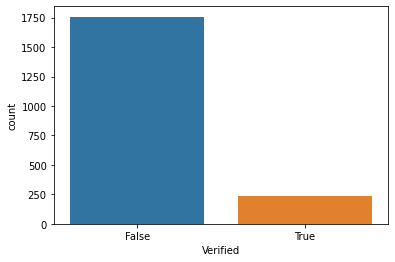

In [32]:
bar = sns.countplot(df['Verified'])

In [33]:
df['Verified'].value_counts()

False    1758
True      235
Name: Verified, dtype: int64

In [34]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

TimesNow           20
republic           14
ndtv                7
ANI                 7
mp_office           6
                   ..
jalajboy            1
AsianetNewsEN       1
NewIndianXpress     1
thecaravanindia     1
rajeev_mp           1
Name: User, Length: 126, dtype: int64

In [35]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({15: 73, 16: 280, 17: 435, 18: 279, 19: 233, 20: 293, 21: 400})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

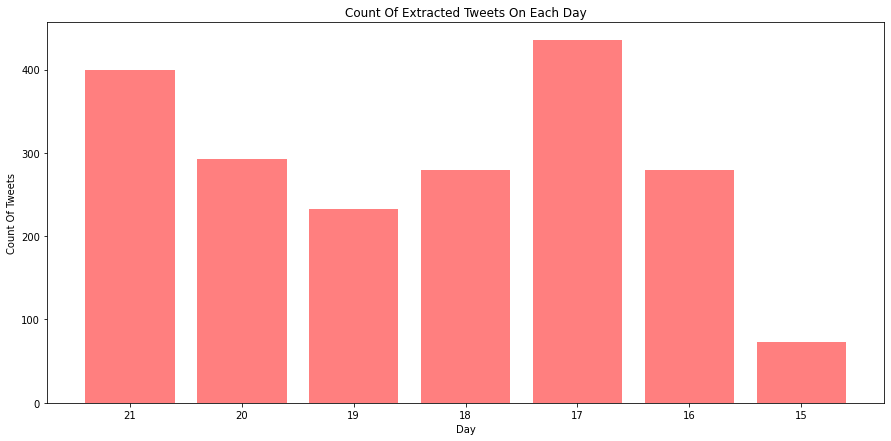

In [36]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [37]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({0: 15,
         1: 21,
         2: 44,
         3: 87,
         4: 104,
         5: 137,
         6: 164,
         7: 118,
         8: 128,
         9: 109,
         10: 137,
         11: 103,
         12: 97,
         13: 114,
         14: 106,
         15: 119,
         16: 109,
         17: 102,
         18: 62,
         19: 40,
         20: 24,
         21: 16,
         22: 14,
         23: 23})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

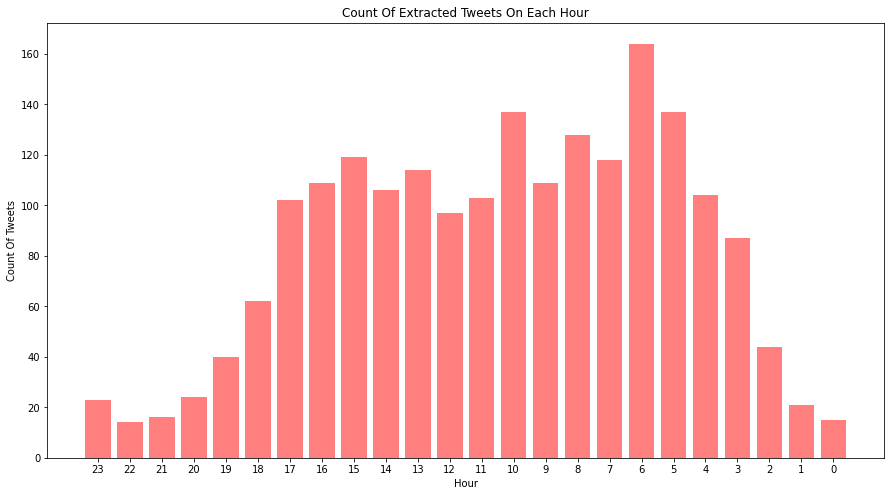

In [38]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [39]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

["hasn't", "should've", 'was', 'aren', 'than', "wouldn't", 'of', 'over', 'out', 'are', 'some', 'above', 'been', "aren't", 'be', 'so', 'yours', "shan't", 'o', 'then', 's', 'now', "won't", 'me', 'its', 'any', 'my', 'for', 'doing', "you've", 'just', 'did', 'before', "hadn't", 'the', 'other', 'while', 'further', 'we', 'a', 'himself', 'too', "mustn't", 'their', 'needn', 'how', 'had', 'here', 'which', "weren't", "that'll", 'these', 'whom', 'i', 'couldn', 'can', 'each', 'only', 'has', 'if', 've', 'wasn', 'most', 'yourself', 'during', 'who', 'does', 'not', 'don', 'ain', 'it', 'd', 'haven', "wasn't", 'below', "doesn't", 'down', 'wouldn', "you're", 'what', 'being', 'an', 'on', 'where', 'hers', 'into', 'his', 'them', 't', 'when', 'ma', 'from', 'once', 'with', 'weren', "haven't", 'ours', "isn't", 'again', 'didn', 'off', 'to', 'few', 'isn', 'nor', 'between', 'as', 'she', 'those', 'were', 'at', 'hadn', 'own', 'and', 'is', 'yourselves', 'themselves', 're', 'myself', 'until', 'he', 'after', 'shan', 's

In [42]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0       want lahdc kargil complete full term bjp mp su...
1       bjp lacks faith leaders west bengal importing ...
2       bjp lacks faith leaders west bengal importing ...
3       bodoland peoples fronts lone mp resigns rajya ...
4       absolutely voices rise like curbing personal l...
                              ...                        
1988    sarshewala traitor muslims knows mercilessly m...
1989    sanjay raut shiv sena rs mp editor samna upset...
1990    kirit somayya bjp mp says uddhhav thakreys wif...
1991    ok lets talk present toomukhtar abbas naqvi pr...
1992    happy diwali madam come join bjp mp seat waiti...
Name: Processed_Tweet, Length: 1993, dtype: object

In [43]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0       [want, lahdc, kargil, complete, full, term, bj...
1       [bjp, lacks, faith, leaders, west, bengal, imp...
2       [bjp, lacks, faith, leaders, west, bengal, imp...
3       [bodoland, peoples, fronts, lone, mp, resigns,...
4       [absolutely, voices, rise, like, curbing, pers...
                              ...                        
1988    [sarshewala, traitor, muslims, knows, merciles...
1989    [sanjay, raut, shiv, sena, rs, mp, editor, sam...
1990    [kirit, somayya, bjp, mp, says, uddhhav, thakr...
1991    [ok, lets, talk, present, toomukhtar, abbas, n...
1992    [happy, diwali, madam, come, join, bjp, mp, se...
Name: Processed_Tweet, Length: 1993, dtype: object

In [44]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0       [want, lahdc, kargil, complet, full, term, bjp...
1       [bjp, lack, faith, leader, west, bengal, impor...
2       [bjp, lack, faith, leader, west, bengal, impor...
3       [bodoland, peopl, front, lone, mp, resign, raj...
4       [absolut, voic, rise, like, curb, person, libe...
                              ...                        
1988    [sarshewala, traitor, muslim, know, mercilessl...
1989    [sanjay, raut, shiv, sena, rs, mp, editor, sam...
1990    [kirit, somayya, bjp, mp, say, uddhhav, thakre...
1991    [ok, let, talk, present, toomukhtar, abba, naq...
1992    [happi, diwali, madam, come, join, bjp, mp, se...
Name: Processed_Tweet, Length: 1993, dtype: object

In [45]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 23:57:50,1330299411323346954,False,Want LAHDC-Kargil to complete its full term: B...,State_Times,Jammu | Kashmir | Delhi,StateTimestw,0,2079,0,0,"[want, lahdc, kargil, complet, full, term, bjp..."
1,2020-11-21 23:56:32,1330299085367222274,False,"BJP Lacks Faith in Its Leaders of West Bengal,...",younews_in,India,dlvr.it,0,868,4,0,"[bjp, lack, faith, leader, west, bengal, impor..."
2,2020-11-21 23:44:34,1330296072636403717,False,"BJP Lacks Faith in Its Leaders of West Bengal,...",Userskynews18,Mumbai,WordPress.com,0,12,50,0,"[bjp, lack, faith, leader, west, bengal, impor..."
3,2020-11-21 23:07:41,1330286794118737923,False,Bodoland People’s Front’s Lone MP Resigns from...,Userskynews18,Mumbai,WordPress.com,0,12,50,0,"[bodoland, peopl, front, lone, resign, rajya, ..."
4,2020-11-21 23:07:26,1330286731535519746,False,@banojyotsna Absolutely! More voices should ri...,The_Indian_1950,India,Twitter Web App,0,17,290,0,"[absolut, voic, rise, like, curb, person, libe..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1988,2020-11-15 12:23:58,1327950467213651973,False,@HateSlayer123 @IchbinUjjaini @zafarsareshwala...,badsha_mukherji,India,Twitter for Android,0,151,339,0,"[sarshewala, traitor, muslim, know, mercilessl..."
1989,2020-11-15 12:22:43,1327950155933392897,False,Sanjay Raut of Shiv Sena RS MP &amp; editor of...,ArunBajpai,Lucknow,Twitter for Android,41,5040,4581,16,"[sanjay, raut, shiv, sena, editor, samna, upse..."
1990,2020-11-15 12:17:46,1327948907289006080,False,Kirit Somayya BJP MP says Uddhhav Thakreys wif...,ArunBajpai,Lucknow,Twitter for Android,12,5040,4581,4,"[kirit, somayya, bjp, say, uddhhav, thakrey, w..."
1991,2020-11-15 12:04:21,1327945530551328768,False,"@NavidMinhas @Umangpatel023 @ImranKhanPTI Ok, ...",Real_Suryansh,"Agra, U.P. ,INDIA",Twitter Web App,0,28,251,0,"[let, talk, present, toomukhtar, abba, naqvi, ..."


In [46]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

33271

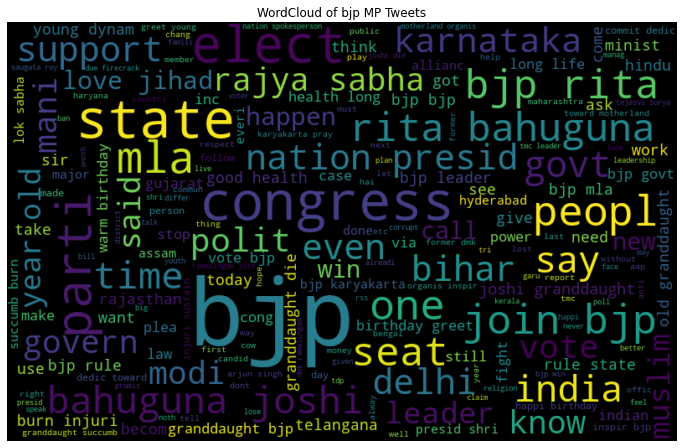

In [47]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of bjp MP Tweets")
plt.show()

In [48]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

1993

In [49]:
len(text)

33271

In [50]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 836
Negative Tweets: 343
Neutral Tweets 814


In [51]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [52]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [53]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.000,0.600,0.400,0.4588
1,0.127,0.718,0.155,0.1280
2,0.152,0.662,0.185,0.1280
3,0.354,0.472,0.173,-0.3182
4,0.118,0.796,0.087,-0.2263
...,...,...,...,...
1988,0.198,0.802,0.000,-0.6908
1989,0.191,0.809,0.000,-0.6369
1990,0.057,0.943,0.000,-0.1779
1991,0.000,1.000,0.000,0.0000


In [54]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.000,0.600,0.400,0.4588,Positive
1,0.127,0.718,0.155,0.1280,Positive
2,0.152,0.662,0.185,0.1280,Positive
3,0.354,0.472,0.173,-0.3182,Negative
4,0.118,0.796,0.087,-0.2263,Negative


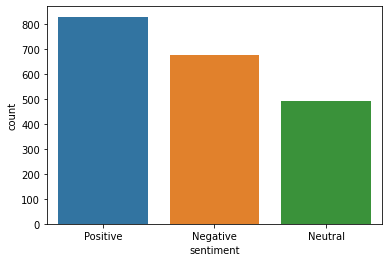

In [55]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [57]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Madhya Pradesh/bjp_mp.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

3905

In [58]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [59]:
word_emotion=dict()
for i in range(0,3905):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [60]:
from numpy import nan
nan == nan


False

In [ ]:
for i in range(0,155):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

KeyError: ignored

In [ ]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

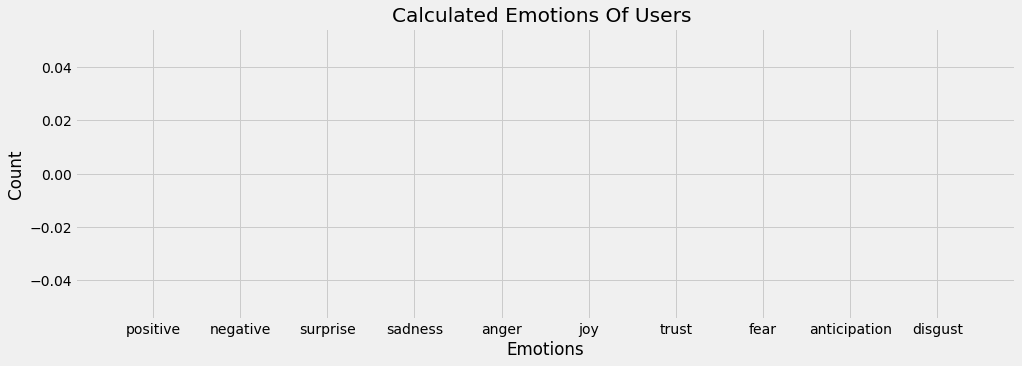

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [ ]:
df.Location  = df.Location.fillna('INDIA')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [ ]:
df.Location = df.Location.apply(lambda x: x.replace('United States','USA'))
df.Location.value_counts()

                    1357
India                317
Hyderabad, India      86
Mumbai, India         78
New Delhi, India      77
                    ... 
DC/Cape Town           1
भारत                   1
Hell, MI               1
Puri, India            1
Why?                   1
Name: Location, Length: 931, dtype: int64

In [ ]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-11-21 23:36:37,1330294072947437568,False,#BJP &amp; #AIADMK tie-up to continue for 2021...,vipulananda,"Colombo, Sri Lanka",Twitter for iPhone,0,2973,5001,0,"[bjp, aiadmk, tie, continu, tamil, nadu, poll]",Colombo
1,2020-11-21 23:33:21,1330293250847088646,False,@my_prema @MyNameIsSenthil @King_Of_Lanka @New...,Meyy_Chennai,"Chennai, India",Twitter for Android,1,143,343,1,"[proof, singl, case, till, date, corrupt, guy,...",Chennai
2,2020-11-21 23:28:15,1330291967260057608,False,The ground worker in fact is in unenviable pos...,mainkaunhoon_,,Twitter Web App,0,41,5,0,"[ground, worker, fact, unenvi, posit, sibal, s...",
3,2020-11-21 23:25:43,1330291330124312590,False,"@KTRTRS @KTRTRS Sir, just ask BJP MP #KishanRe...",Hyderabadmpost,Hyderabad,FS Poster,0,38,236,0,"[sir, ask, bjp, kishanreddi, secunderabad, use...",Hyderabad
4,2020-11-21 23:19:03,1330289654227218438,False,#winner #Manipur Power through knowledge site:...,FutureWorldCen,UK,Tweet Suite,0,3685,4791,0,"[winner, manipur, power, knowledg, site, local...",UK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693,2020-11-15 12:03:45,1327945380315549696,False,Something good coming up in your way Sushil Mo...,pallzie,India,Twitter for Android,4,188,57,0,"[someth, good, come, way, sushil, modi, deputi...",India
3694,2020-11-15 11:56:22,1327943523212038147,False,@Mr_Siddharth There is a predictable sickening...,S_K_Raman,India,Twitter for iPhone,0,441,666,0,"[predict, sicken, chain, event, anti, hindu, e...",India
3695,2020-11-15 11:56:20,1327943515343527938,False,@BJP4India @bandisanjay_bjp @JPNadda @byadavbj...,KalakotaAbhine1,"Hyderabad, India",Twitter for Android,0,23,48,0,"[sir, pleas, help, back, work, help, famili, d...",Hyderabad
3696,2020-11-15 11:55:46,1327943372183461891,False,Talks were on that BJP will go for the UP mode...,Saysniha,भारत गणराज्य,Twitter for iPhone,4,965,291,0,"[talk, bjp, model, toh, hai, chatukaar, tere, ...",भारत गणराज्य


In [61]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [62]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,sentiment,day
0,2020-11-21 23:57:50,1330299411323346954,False,Want LAHDC-Kargil to complete its full term: B...,State_Times,Jammu | Kashmir | Delhi,StateTimestw,0,2079,0,0,"[want, lahdc, kargil, complet, full, term, bjp...",Positive,21
1,2020-11-21 23:56:32,1330299085367222274,False,"BJP Lacks Faith in Its Leaders of West Bengal,...",younews_in,India,dlvr.it,0,868,4,0,"[bjp, lack, faith, leader, west, bengal, impor...",Positive,21
2,2020-11-21 23:44:34,1330296072636403717,False,"BJP Lacks Faith in Its Leaders of West Bengal,...",Userskynews18,Mumbai,WordPress.com,0,12,50,0,"[bjp, lack, faith, leader, west, bengal, impor...",Positive,21
3,2020-11-21 23:07:41,1330286794118737923,False,Bodoland People’s Front’s Lone MP Resigns from...,Userskynews18,Mumbai,WordPress.com,0,12,50,0,"[bodoland, peopl, front, lone, resign, rajya, ...",Negative,21
4,2020-11-21 23:07:26,1330286731535519746,False,@banojyotsna Absolutely! More voices should ri...,The_Indian_1950,India,Twitter Web App,0,17,290,0,"[absolut, voic, rise, like, curb, person, libe...",Negative,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


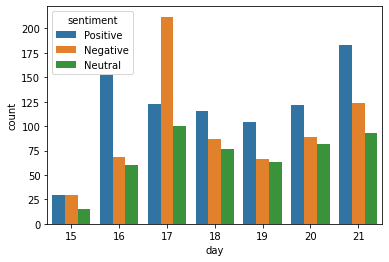

In [63]:
sns.countplot(df['day'],hue = df['sentiment'])

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [65]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,sentiment,day,sentiment_1
0,2020-11-21 23:57:50,1330299411323346954,False,Want LAHDC-Kargil to complete its full term: B...,State_Times,Jammu | Kashmir | Delhi,StateTimestw,0,2079,0,0,"[want, lahdc, kargil, complet, full, term, bjp...",Positive,21,2
1,2020-11-21 23:56:32,1330299085367222274,False,"BJP Lacks Faith in Its Leaders of West Bengal,...",younews_in,India,dlvr.it,0,868,4,0,"[bjp, lack, faith, leader, west, bengal, impor...",Positive,21,2
2,2020-11-21 23:44:34,1330296072636403717,False,"BJP Lacks Faith in Its Leaders of West Bengal,...",Userskynews18,Mumbai,WordPress.com,0,12,50,0,"[bjp, lack, faith, leader, west, bengal, impor...",Positive,21,2
3,2020-11-21 23:07:41,1330286794118737923,False,Bodoland People’s Front’s Lone MP Resigns from...,Userskynews18,Mumbai,WordPress.com,0,12,50,0,"[bodoland, peopl, front, lone, resign, rajya, ...",Negative,21,0
4,2020-11-21 23:07:26,1330286731535519746,False,@banojyotsna Absolutely! More voices should ri...,The_Indian_1950,India,Twitter Web App,0,17,290,0,"[absolut, voic, rise, like, curb, person, libe...",Negative,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,2020-11-15 12:23:58,1327950467213651973,False,@HateSlayer123 @IchbinUjjaini @zafarsareshwala...,badsha_mukherji,India,Twitter for Android,0,151,339,0,"[sarshewala, traitor, muslim, know, mercilessl...",Negative,15,0
1989,2020-11-15 12:22:43,1327950155933392897,False,Sanjay Raut of Shiv Sena RS MP &amp; editor of...,ArunBajpai,Lucknow,Twitter for Android,41,5040,4581,16,"[sanjay, raut, shiv, sena, editor, samna, upse...",Negative,15,0
1990,2020-11-15 12:17:46,1327948907289006080,False,Kirit Somayya BJP MP says Uddhhav Thakreys wif...,ArunBajpai,Lucknow,Twitter for Android,12,5040,4581,4,"[kirit, somayya, bjp, say, uddhhav, thakrey, w...",Negative,15,0
1991,2020-11-15 12:04:21,1327945530551328768,False,"@NavidMinhas @Umangpatel023 @ImranKhanPTI Ok, ...",Real_Suryansh,"Agra, U.P. ,INDIA",Twitter Web App,0,28,251,0,"[let, talk, present, toomukhtar, abba, naqvi, ...",Neutral,15,1


In [66]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [68]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [69]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.7424749163879598
Precision Score:  0.7424749163879598
Recall Score:  0.7424749163879598
F1 Score:  0.7424749163879598


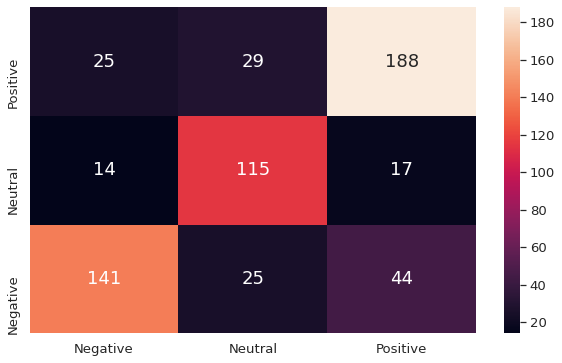

In [70]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [71]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [72]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [73]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.5154419321685509
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 9, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [74]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.5016722408026756
Precision Score:  0.5016722408026756
Recall Score:  0.5016722408026756
F1 Score:  0.5016722408026756


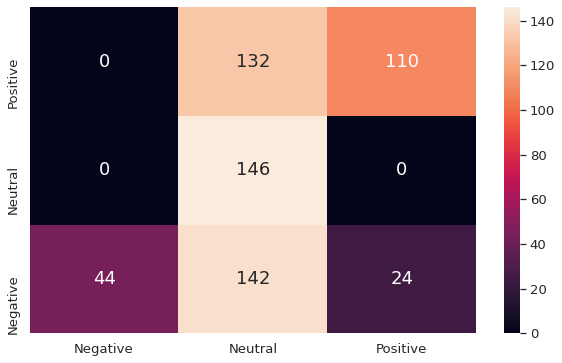

In [75]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [76]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [77]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.7926421404682275
Precision Score:  0.7926421404682275
Recall Score:  0.7926421404682275
F1 Score:  0.7926421404682275


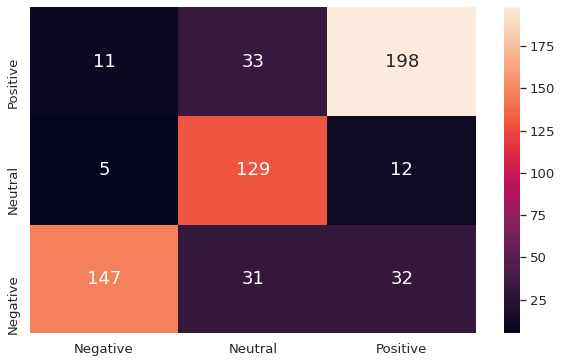

In [78]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [79]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [80]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=300, max_depth=18, criterion=entropy ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, max_depth=18, criterion=entropy, score=0.620, total=   1.5s
[CV] n_estimators=300, max_depth=18, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  n_estimators=300, max_depth=18, criterion=entropy, score=0.602, total=   1.4s
[CV] n_estimators=300, max_depth=18, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV]  n_estimators=300, max_depth=18, criterion=entropy, score=0.609, total=   1.5s
[CV] n_estimators=300, max_depth=18, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.4s remaining:    0.0s


[CV]  n_estimators=300, max_depth=18, criterion=entropy, score=0.606, total=   1.4s
[CV] n_estimators=300, max_depth=18, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.9s remaining:    0.0s


[CV]  n_estimators=300, max_depth=18, criterion=entropy, score=0.602, total=   1.5s
[CV] n_estimators=400, max_depth=6, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.3s remaining:    0.0s


[CV]  n_estimators=400, max_depth=6, criterion=gini, score=0.527, total=   1.1s
[CV] n_estimators=400, max_depth=6, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.4s remaining:    0.0s


[CV]  n_estimators=400, max_depth=6, criterion=gini, score=0.509, total=   1.1s
[CV] n_estimators=400, max_depth=6, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    9.5s remaining:    0.0s


[CV]  n_estimators=400, max_depth=6, criterion=gini, score=0.502, total=   1.1s
[CV] n_estimators=400, max_depth=6, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.6s remaining:    0.0s


[CV]  n_estimators=400, max_depth=6, criterion=gini, score=0.534, total=   1.1s
[CV] n_estimators=400, max_depth=6, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   11.6s remaining:    0.0s


[CV]  n_estimators=400, max_depth=6, criterion=gini, score=0.534, total=   1.1s
[CV] n_estimators=100, max_depth=8, criterion=gini ...................
[CV]  n_estimators=100, max_depth=8, criterion=gini, score=0.563, total=   0.3s
[CV] n_estimators=100, max_depth=8, criterion=gini ...................
[CV]  n_estimators=100, max_depth=8, criterion=gini, score=0.541, total=   0.3s
[CV] n_estimators=100, max_depth=8, criterion=gini ...................
[CV]  n_estimators=100, max_depth=8, criterion=gini, score=0.534, total=   0.3s
[CV] n_estimators=100, max_depth=8, criterion=gini ...................
[CV]  n_estimators=100, max_depth=8, criterion=gini, score=0.552, total=   0.3s
[CV] n_estimators=100, max_depth=8, criterion=gini ...................
[CV]  n_estimators=100, max_depth=8, criterion=gini, score=0.523, total=   0.3s
[CV] n_estimators=1300, max_depth=4, criterion=gini ..................
[CV]  n_estimators=1300, max_depth=4, criterion=gini, score=0.509, total=   3.1s
[CV] n_estima

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


0.6078853046594982
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 18, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [81]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.6505016722408027
Precision Score:  0.6505016722408027
Recall Score:  0.6505016722408027
F1 Score:  0.6505016722408027


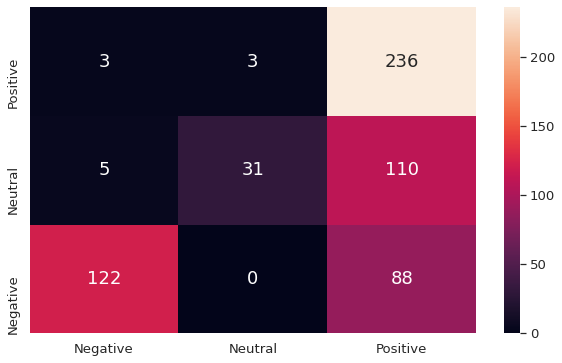

In [82]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [83]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.6605351170568562
Precision Score:  0.6605351170568562
Recall Score:  0.6605351170568562
F1 Score:  0.6605351170568562


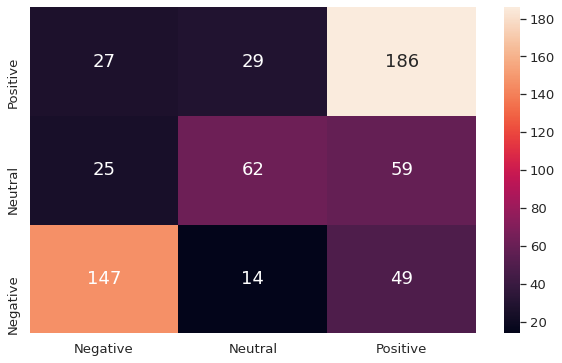

In [85]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [86]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [87]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.6709558067831449
{'alpha': 1, 'class_prior': None, 'fit_prior': True}


In [88]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.6605351170568562
Precision Score:  0.6605351170568562
Recall Score:  0.6605351170568562
F1 Score:  0.6605351170568562


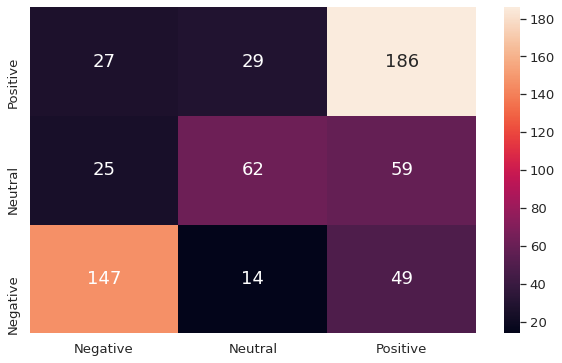

In [89]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

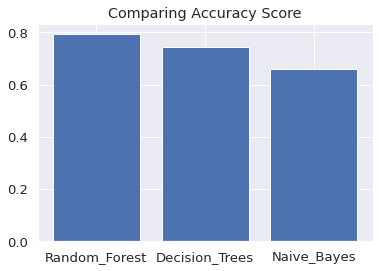

In [90]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

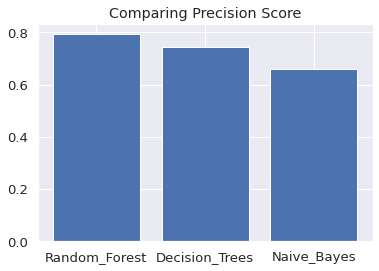

In [91]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

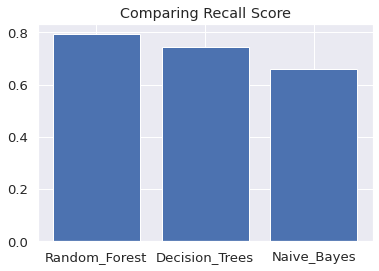

In [92]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

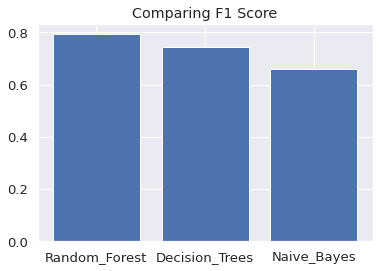

In [93]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()